# Import packages
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [1]:
import yfinance as yf # yahoo finance package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas_datareader as web
import seaborn as sns
from datetime import date, datetime
from math import log, sqrt, pi, exp
from pandas import DataFrame

# Download trading data through Yahoo Finance
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [2]:
Tsla = yf.download('TSLA',parse_dates=True) # get data source
tsla = yf.Ticker('TSLA')

[*********************100%***********************]  1 of 1 completed


In [3]:
Tsla.tail(n=5) # already have 'Date' as index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400
2022-04-19,1005.059998,1034.939941,995.330017,1028.150024,1028.150024,16615900
2022-04-20,1030.000000,1034.000000,975.250000,977.200012,977.200012,23570400
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600


In [4]:
# changing index format from datetime to date
Tsla.index = Tsla.index.strftime('%Y-%m-%d')
Tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2976 entries, 2010-06-29 to 2022-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2976 non-null   float64
 1   High       2976 non-null   float64
 2   Low        2976 non-null   float64
 3   Close      2976 non-null   float64
 4   Adj Close  2976 non-null   float64
 5   Volume     2976 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 162.8+ KB


<AxesSubplot:xlabel='Date'>

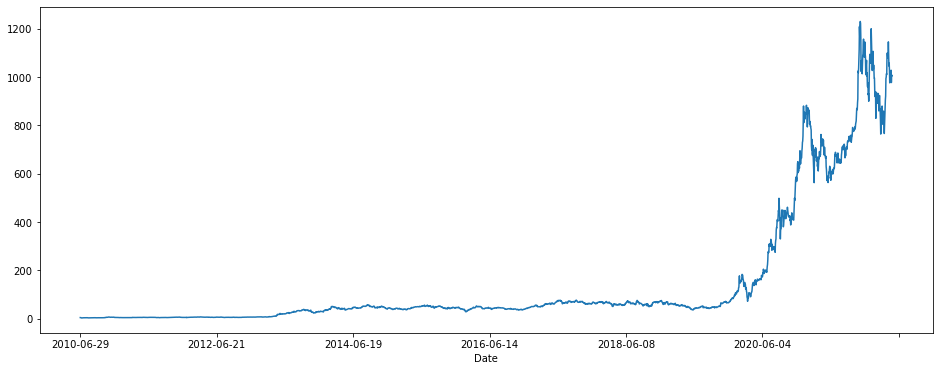

In [5]:
# historical stock price line graph
Tsla['Adj Close'].plot(figsize=(16,6))

# Data massage and financial calculation
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [6]:
# creating a new column to show daily return
Tsla['pct_change'] = Tsla['Adj Close'].pct_change(1)
Tsla.dropna()

,Open,High,Low,Close,Adj Close,Volume,pct_change
Date,,,,,,,
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,-0.002512
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,-0.078472
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,-0.125683
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,-0.160938
2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500,-0.019243
...,...,...,...,...,...,...,...
2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400,0.019584
2022-04-19,1005.059998,1034.939941,995.330017,1028.150024,1028.150024,16615900,0.023758
2022-04-20,1030.000000,1034.000000,975.250000,977.200012,977.200012,23570400,-0.049555


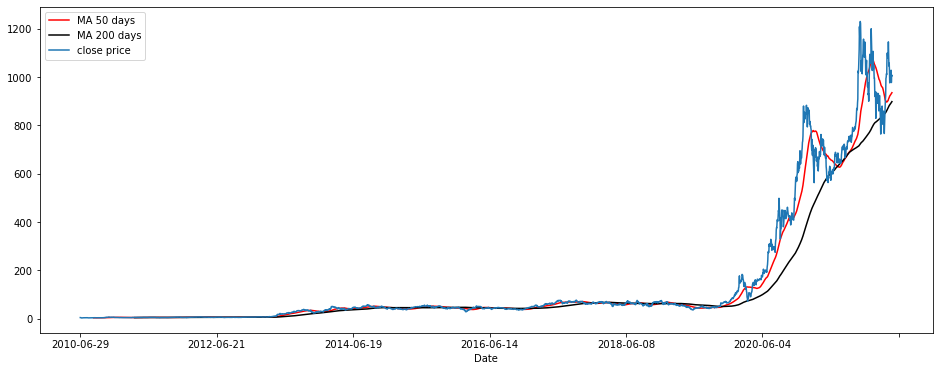

In [7]:
# implementing rolling window calculaltion
Tsla['sma50'] = Tsla['Adj Close'].rolling(50).mean()
Tsla['sma200'] = Tsla['Adj Close'].rolling(200).mean()
# ploting simple MA 50 and MA 200 with close price
Tsla['sma50'].plot(label = 'MA 50 days',figsize=(16,6),color = 'red')
Tsla['sma200'].plot(label = 'MA 200 days',figsize=(16,6), color = 'black')
Tsla['Adj Close'].plot(label = 'close price',figsize=(16,6))
plt.legend()
plt.show()

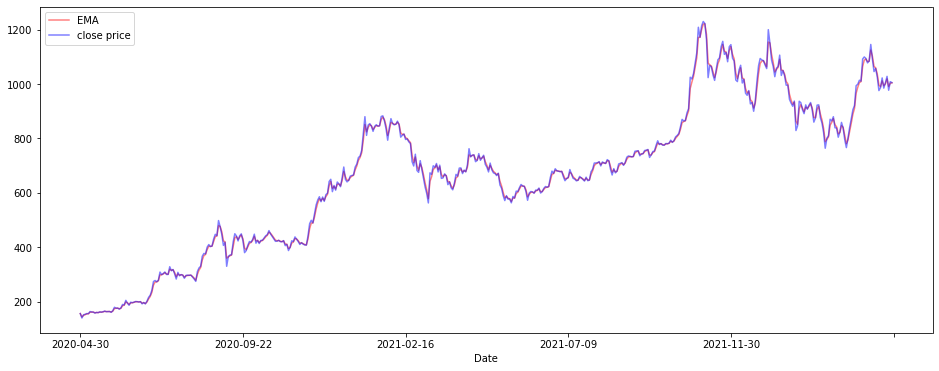

In [9]:
# drawing exponential MA, more sensitive than simple MA. The exponential moving average is a type of 
# moving average that gives more weight to recent prices in an attempt to make it more responsive to 
# new information.
Tsla['Adj Close'].tail(n=500).ewm(com = 0.5).mean().plot(label = 'EMA',figsize=(16,6),color = 'red',alpha=0.5)
Tsla['Adj Close'].tail(n=500).plot(label = 'close price',figsize=(16,6),color = 'blue',alpha=0.5)
plt.legend()
plt.show()

# Build trading strategy for Tesla Stock
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [11]:
# simulating trading strategy: buy and hold one stock as long as MA 10 > MA 50, otherwise sell and not hold
Tsla['sma10'] = Tsla['Adj Close'].rolling(10).mean()
Tsla['sma50'] = Tsla['Adj Close'].rolling(50).mean()
Tsla['sma200'] = Tsla['Adj Close'].rolling(200).mean()
Tsla = Tsla.dropna()
Tsla.head(n=5)

,Open,High,Low,Close,Adj Close,Volume,pct_change,sma50,sma200,sma10
Date,,,,,,,,,,
2011-04-12,5.016,5.042,4.860,4.930,4.930,6787000,-0.024535,4.79188,4.74527,5.2158
2011-04-13,5.026,5.138,4.962,4.986,4.986,6057500,0.011359,4.79596,4.74631,5.2402
2011-04-14,4.974,5.056,4.840,5.028,5.028,4917000,0.008424,4.80076,4.74762,5.1880
2011-04-15,5.130,5.236,5.082,5.116,5.116,4717500,0.017502,4.80856,4.75124,5.1664
2011-04-18,5.026,5.124,4.872,5.006,5.006,5169500,-0.021501,4.81484,4.75707,5.1504


In [12]:
# creating share status in Tsla
Tsla['share'] = [1 if Tsla.loc[row_indexer, 'sma10'] > Tsla.loc[row_indexer, 'sma50'] else 0 for row_indexer in Tsla.index]

/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_1857/2995559004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['share'] = [1 if Tsla.loc[row_indexer, 'sma10'] > Tsla.loc[row_indexer, 'sma50'] else 0 for row_indexer in Tsla.index]


In [13]:
Tsla.head(n=5)

,Open,High,Low,Close,Adj Close,Volume,pct_change,sma50,sma200,sma10,share
Date,,,,,,,,,,,
2011-04-12,5.016,5.042,4.860,4.930,4.930,6787000,-0.024535,4.79188,4.74527,5.2158,1
2011-04-13,5.026,5.138,4.962,4.986,4.986,6057500,0.011359,4.79596,4.74631,5.2402,1
2011-04-14,4.974,5.056,4.840,5.028,5.028,4917000,0.008424,4.80076,4.74762,5.1880,1
2011-04-15,5.130,5.236,5.082,5.116,5.116,4717500,0.017502,4.80856,4.75124,5.1664,1
2011-04-18,5.026,5.124,4.872,5.006,5.006,5169500,-0.021501,4.81484,4.75707,5.1504,1


/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_1857/708555578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['Close1'] = Tsla['Adj Close'].shift(-1)
/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_1857/708555578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['Profit'] = [(Tsla.loc[index, 'Close1'] - Tsla.loc[index, 'Adj Close'])/Tsla.loc[index, 'Adj Close']


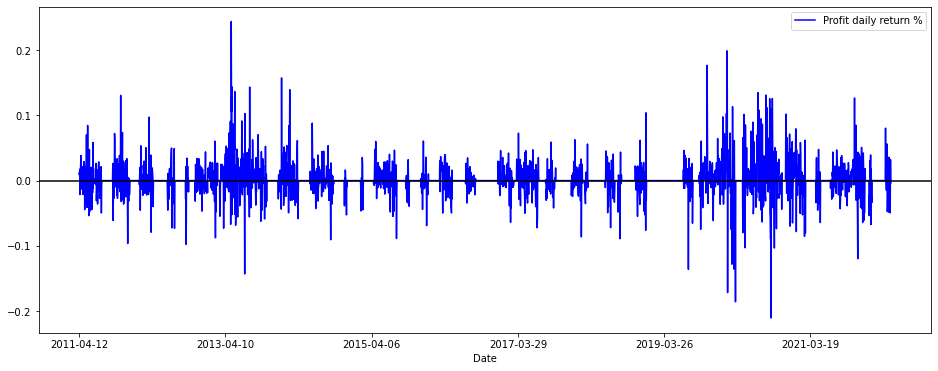

In [14]:
# Plotting profit daily return
Tsla['Close1'] = Tsla['Adj Close'].shift(-1)
Tsla['Profit'] = [(Tsla.loc[index, 'Close1'] - Tsla.loc[index, 'Adj Close'])/Tsla.loc[index, 'Adj Close'] 
                  if Tsla.loc[index, 'share']==1 else 0 for index in Tsla.index]
Tsla['Profit'].plot(figsize=(16,6),color = 'blue',label = 'Profit daily return %')
plt.axhline(y=0,color = 'black')
plt.legend()
plt.show()

/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_1857/3994902016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['cumprofit'] = (1+Tsla['Profit']).cumprod()-1
/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_1857/3994902016.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['cumulated_MC_growth'] = (1+Tsla['pct_change']).cumprod()-1


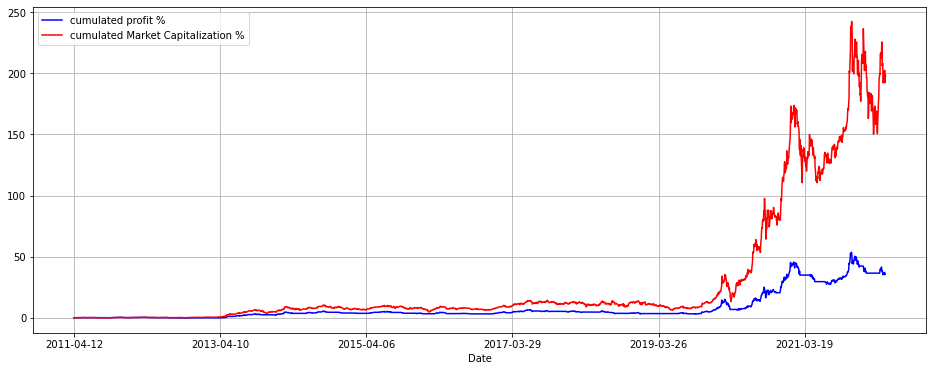

In [15]:
# Plotting cumulated profit in percentage and market capitalization in percentage
for index in Tsla.index:
    if Tsla.loc[index, 'Profit'] != 0:
        Tsla['cumprofit'] = (1+Tsla['Profit']).cumprod()-1
    else:
        continue
Tsla['cumulated_MC_growth'] = (1+Tsla['pct_change']).cumprod()-1
Tsla['cumprofit'].plot(figsize=(16,6), color = 'blue', label = 'cumulated profit %')
Tsla['cumulated_MC_growth'].plot(figsize=(16,6), color = 'red', label = 'cumulated Market Capitalization %')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Sharpe ratio for Trading strategy vs. buy_and_hold strategy
risk_free_rate = 0
T_mean_return = Tsla["Profit"].mean()
T_std = Tsla["Profit"].std()
T_sharpe_ratio = ((T_mean_return-risk_free_rate) / T_std )* (252**0.5)

mean_return = Tsla['pct_change'].mean()
std = Tsla['pct_change'].std()
sharpe_ratio = (mean_return-risk_free_rate) / std * (252**0.5)
print(f"""

For tesla stock trading, MA Trading strategy has sharpe ratio of {round(T_sharpe_ratio, 2)},
buy and hold strategy since IPO has sharpe ratio of {round(sharpe_ratio, 2)}.

""")



For tesla stock trading, MA Trading strategy has sharpe ratio of 0.99,
buy and hold strategy since IPO has sharpe ratio of 1.14.




# Daily return distribution features
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_1857/2606368146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['log_return'] = np.log(Tsla['Adj Close']).shift(-1) - np.log(Tsla['Adj Close'])


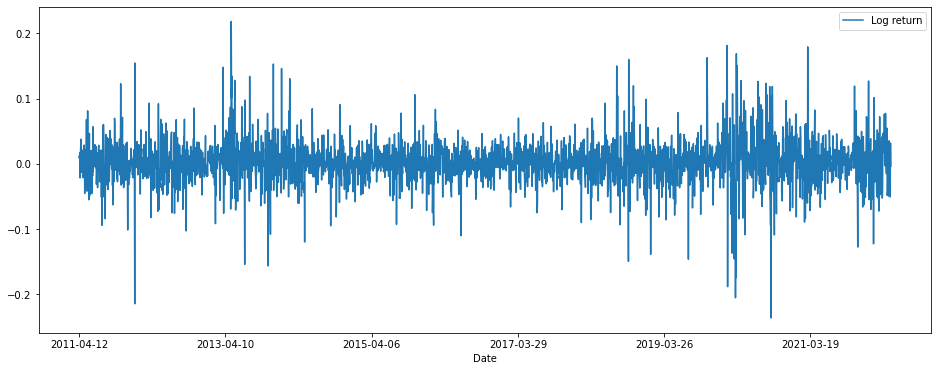

In [18]:
# plotting log return for Tesla stock price
Tsla['log_return'] = np.log(Tsla['Adj Close']).shift(-1) - np.log(Tsla['Adj Close'])
Tsla['log_return'].plot(figsize=(16,6), label='Log return')
plt.legend()
plt.show()

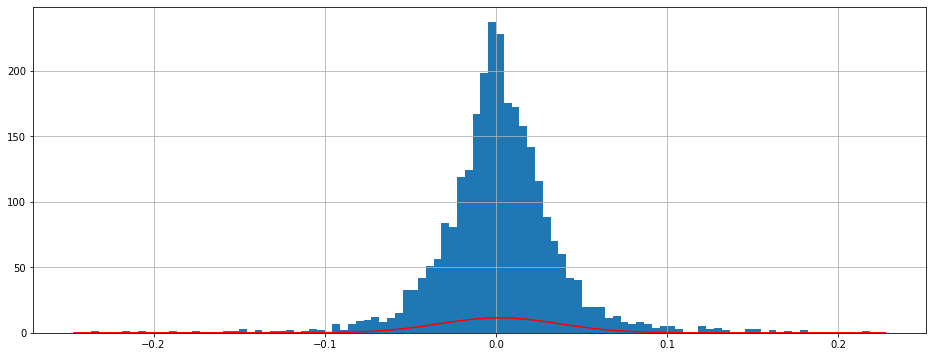

In [20]:
from scipy.stats import norm
mu = Tsla['log_return'].mean()
sigma = Tsla['log_return'].std()
density = pd.DataFrame()
density['x'] = np.arange(Tsla['log_return'].min()-0.01, Tsla['log_return'].max()+0.01, 0.001) # Return evenly spaced values within a given interval
density['pdf'] = norm.pdf(density['x'], mu, sigma) # Probability density function at x of the given RV

Tsla['log_return'].hist(bins=100, figsize=(16, 6))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

/Users/lilialyssali/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lilialyssali/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


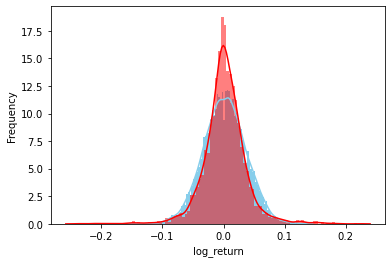

In [21]:
# creating the visual difference in log return distribution and normal distribution
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=mu,scale=sigma)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

ax = sns.distplot(Tsla['log_return'],
                 bins=100,
                 kde=True,
                 color='red',
                 hist_kws={"linewidth": 12, 'alpha':0.5})

# Tesla option pricing in Black Scholes model
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [23]:
# defining functions needed for Black Scholes option pricing model
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

# Tesla stock option pricing
stock = 'tsla'
expiry = '05-20-2022'
strike_price = 1000 # chose from interest or high volume

today = datetime.now()
one_year_ago = today.replace(year=today.year-1) # chose one year historical data to calculate statistics

df = web.DataReader(stock, 'yahoo', one_year_ago, today)
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)
df = df.dropna()

sigma = np.sqrt(252) * df['returns'].std()
rf = (web.DataReader(
    "^TNX", 'yahoo', one_year_ago, today)['Close'].iloc[-1])/100 # 10-year U.S. treasury yield
sp = df['Close'].iloc[-1] # spot price of Tesla stock
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365
print(f'The Option Price for call option with strike price of {strike_price} and expiry at {expiry} is: ', 
      round(bs_call(sp, strike_price, t, rf, sigma),2))

The Option Price for call option with strike price of 1000 and expiry at 05-20-2022 is:  60.01
